In [1]:
import re
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
path = r'/Volumes/andy_SSD/KUL/Datathon_Duolingo/duolingo_datathon/data/user_fingerprint_B_lex_clusters.csv'
df = pd.read_csv(path)
df.head(30)

,Unnamed: 0,user_id,max_history_seen,vocab_size,learning_speed,lex_cluster_0_ability,lex_cluster_0_seen,lex_cluster_10_ability,lex_cluster_10_seen,lex_cluster_11_ability,...,lex_cluster_79_ability,lex_cluster_79_seen,lex_cluster_7_ability,lex_cluster_7_seen,lex_cluster_80_ability,lex_cluster_80_seen,lex_cluster_8_ability,lex_cluster_8_seen,lex_cluster_9_ability,lex_cluster_9_seen
0,0,u:0X2,15,9,13.563969,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,u:0b,12,12,3.629236,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026539,1.340426
2,2,u:0xw,20,108,2.633296,0.000000,0.000000,0.000000,0.00,0.0,...,0.007076,0.073171,0.000000,0.000000,0.000000,0.000000,0.010506,0.151515,0.011766,0.063830
3,3,u:1EH,14,52,2.580331,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.012514,0.041667,0.008262,0.152174,0.000000,0.000000,0.000000,0.000000
4,4,u:1gx,15,71,7.584663,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.013606,0.130435,0.016060,0.121212,0.000000,0.000000
5,5,u:1mo,33,36,2.041634,0.000000,0.000000,0.000000,0.00,0.0,...,0.012415,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,u:2Ku,22,5,7.606040,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,u:2Vn,12,16,14.139332,0.000000,0.000000,0.000000,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.008015,0.043478,0.010506,0.060606,0.010876,0.148936
8,8,u:2m9,32,95,2.954690,0.000000,0.000000,0.000000,0.00,0.0,...,0.003480,0.073171,0.000000,0.000000,0.010638,0.369565,0.000000,0.000000,0.000000,0.000000
9,9,u:2mx,35,133,4.016289,0.000000,0.000000,0.000153,0.05,0.0,...,0.000000,0.000000,0.000000,0.000000,0.012732,0.282609,0.010506,0.181818,0.000000,0.000000


## Metric Validation

### This indicates that the two indicators ('ability' and 'seen') are indeed related (those who have seen them do indeed have a high positive correlation with those who have learned them).

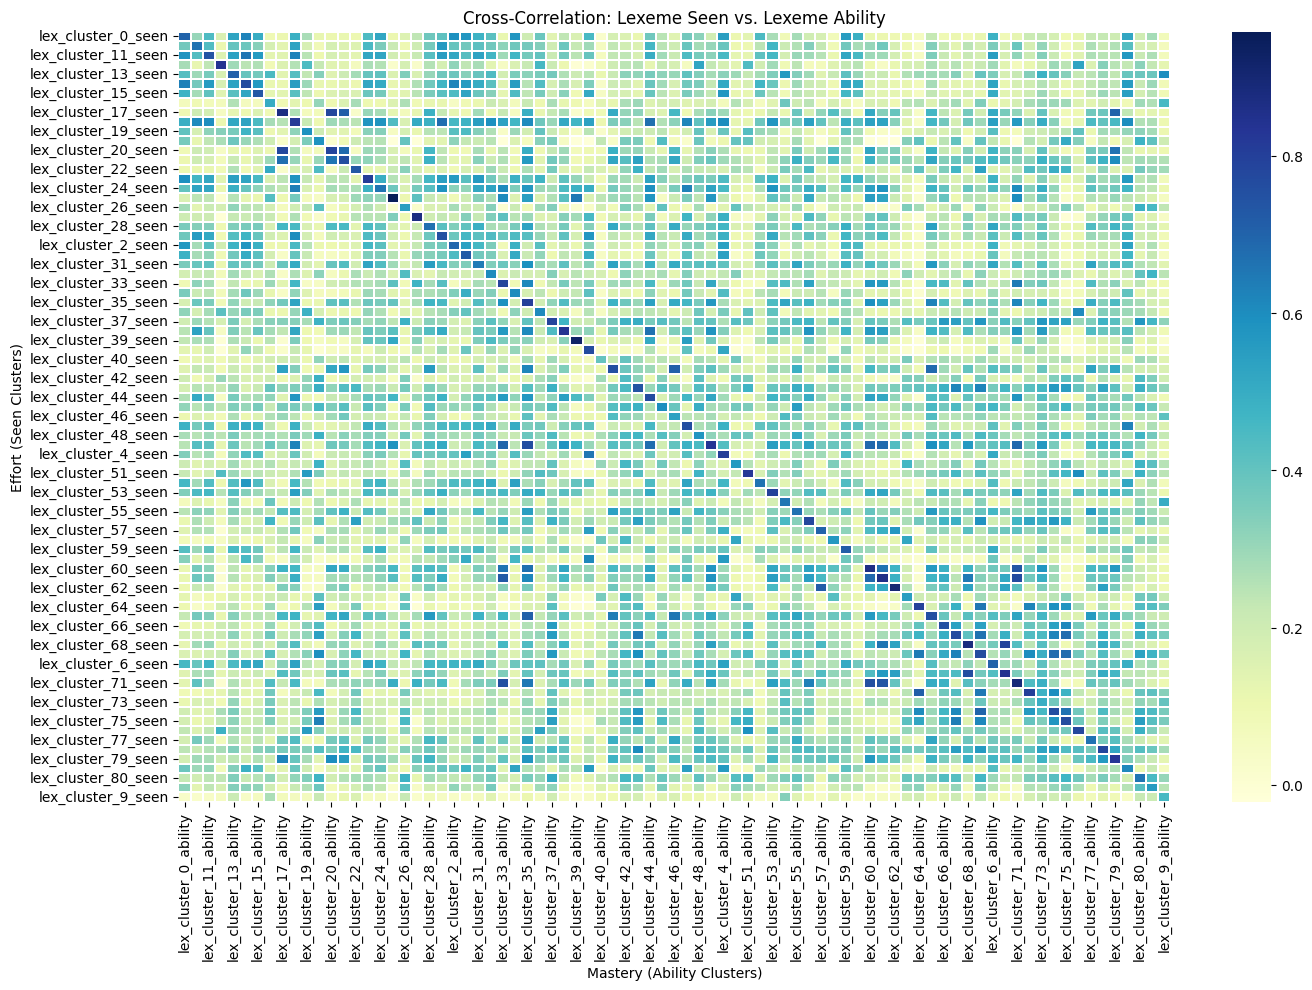

In [4]:
ability_cols = sorted([col for col in df.columns if 'ability' in col])
seen_cols = sorted([col for col in df.columns if 'seen' in col and col != 'max_history_seen'])

cross_corr = df[seen_cols + ability_cols].corr().loc[seen_cols, ability_cols]

plt.figure(figsize=(16, 10))
sns.heatmap(cross_corr, 
            cmap='YlGnBu',   
            annot=False, 
            linewidths=0.1)

plt.title('Cross-Correlation: Lexeme Seen vs. Lexeme Ability')
plt.xlabel('Mastery (Ability Clusters)')
plt.ylabel('Effort (Seen Clusters)')
plt.show()

### Identify the actual category of each cluster
The actual category results shown in 'lexeme_cluster_interpretation.md'

In [14]:
df_lexeme_clusters = pd.read_csv('../data/lexeme_cluster_results.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

for i in range(81):
    top_words = df_lexeme_clusters[df_lexeme_clusters['cluster'] == i]['word'].value_counts().head(15).index.tolist()
    print(f"Cluster {i}: {', '.join(top_words)}")

Cluster 0: <*sf>/encontrar, <*sf>/achar, encontrar/encontrar, encontrado/encontrar, encontrando/encontrar, achar/achar
Cluster 1: <*sf>/beber, <*sf>/comer, <*sf>/tomar, bebem/beber, bebe/beber, tomar/tomar, comer/comer, tomando/tomar, toma/tomar, beber/beber, <*sf>/fumar, comendo/comer, bebemos/beber, comem/comer, come/comer
Cluster 2: <*sf>/lembrar, <*sf>/esquecer, <*sf>/recordar, lembro/lembrar, esquecer/esquecer, lembrar/lembrar, recordar/recordar, lembrando/lembrar
Cluster 3: <*sf>/haver, <*sf>/existir, haver/haver, existir/existir, houvesse/haver
Cluster 4: <*sf>/amar, <*sf>/adorar, <*sf>/odiar, <*sf>/querido, ama/amar, <*sf>/curto, curto/curto, amar/amar, adorar/adorar, adorando/adorar
Cluster 5: <*sf>/tentar, tentando/tentar, tenta/tentar, tentar/tentar, tentado/tentar, tento/tentar
Cluster 6: <*sf>/querer, quer/querer, vai/ir, querer/querer, quero/querer, queremos/querer, queria/querer, conseguimos/conseguir, podendo/poder, vou/ir, <*sf>/planejar, espero/esperar, vão/ir, consig

## Extract digital fingerprint by target user

### User fingerprint radar image

In [ ]:
def plot_user_radar(df, target_user_id, top_n=8, base_on="_ability"):
    cols_ab = [col for col in df.columns if base_on in col and col != "max_history_seen"]
    
    user_row = df[df['user_id'] == target_user_id][cols_ab]
    
    if user_row.empty:
        print(f"Cannot Found User: {target_user_id}")
        return
    
    user_series = user_row.iloc[0]
    
    # 3. 自動抓取分數大於 0 且表現最強的前 n 個 Cluster (避免雷達圖太亂)
    top_clusters = user_series[user_series > 0].sort_values(ascending=False).head(top_n)
    
    if top_clusters.empty:
        print("This user currently has no ability score record.")
        return

    r_values = top_clusters.values.tolist()
    r_values += [r_values[0]]
    
    theta_labels = [c for c in top_clusters.index.tolist()]
    theta_labels += [theta_labels[0]]

    fig = go.Figure(data=go.Scatterpolar(
        r=r_values,
        theta=theta_labels,
        fill='toself',
        name=f'User {target_user_id}',
        line=dict(color='#636EFA')
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max(r_values) * 1.1]
            )
        ),
        showlegend=True,
        title=f"Digital Fingerprint for User: {target_user_id} (Top {top_n} Clusters)"
    )
    
    fig.show()

plot_user_radar(df, 'u:9rx', top_n=10, base_on='_seen')

In [12]:
plot_user_radar(df, 'u:9rx', top_n=10)

### User fingerprint bubble image

In [ ]:
def plot_bubbles(df, target_user_id):
    cols_ab = [col for col in df.columns if '_ability' in col]
    user_row = df[df['user_id'] == target_user_id]
    if user_row.empty: return
    
    data = []
    for col in cols_ab:
        cluster_full_name = col.replace('_ability', '')
        cluster_id = re.search(r'\d+', cluster_full_name).group()
        ability = user_row[f'{cluster_full_name}_ability'].values[0]
        seen = user_row[f'{cluster_full_name}_seen'].values[0]
        
        if seen > 0:
            data.append({
                'Cluster_Num': cluster_id,
                'Practice_Intensity': seen,
                'Mastery_Score': ability,
                'Weight': ability * 100 
            })
    
    plot_df = pd.DataFrame(data)
    
    mean_seen = plot_df['Practice_Intensity'].mean()
    mean_ability = plot_df['Mastery_Score'].mean()
    
    def label_filter(row):
        is_outlier = (row['Practice_Intensity'] > mean_seen * 1.5) or \
                     (row['Mastery_Score'] > mean_ability * 1.5) or \
                     (row['Practice_Intensity'] > mean_seen and row['Mastery_Score'] < mean_ability * 0.5)
        return row['Cluster_Num'] if is_outlier else ""

    plot_df['Display_Label'] = plot_df.apply(label_filter, axis=1)

    fig = px.scatter(plot_df, 
                     x="Practice_Intensity", 
                     y="Mastery_Score",
                     size="Weight", 
                     color="Mastery_Score",
                     hover_name="Cluster_Num", 
                     text="Display_Label",    
                     size_max=40,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title=f"Learning Efficiency Analysis: User {target_user_id}")

    fig.update_traces(textposition='middle center', textfont_size=10)
    fig.add_hline(y=mean_ability, line_dash="dot", line_color="gray", opacity=0.5)
    fig.add_vline(x=mean_seen, line_dash="dot", line_color="gray", opacity=0.5)

    fig.update_layout(
        xaxis_title="Practice intensity (Seen)", 
        yaxis_title="Mastery (Ability)",
        plot_bgcolor='white'
    )
    fig.show()

plot_bubbles(df, 'u:9rx')

### Using 'learning_speed' as clustering color show the distribution of all users

In [ ]:
from sklearn.manifold import TSNE

# Use scaled data
df_scaled = pd.read_csv('/Volumes/andy_SSD/KUL/Datathon_Duolingo/duolingo_datathon/data/user_fingerprint_B_lex_clusters_scaled.csv')

ability_cols = [col for col in df_scaled.columns if '_ability' in col]
seen_cols = sorted([col for col in df.columns if 'seen' in col and col != 'max_history_seen'])
target_cols = ability_cols + seen_cols

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
user_emb_3d = tsne_3d.fit_transform(df_scaled[target_cols].head(500))

plot_df = pd.DataFrame(user_emb_3d, columns=['x', 'y', 'z'])
plot_df['learning_speed'] = df_scaled['learning_speed'].head(500).values
plot_df['user_id'] = df_scaled['user_id'].head(500).values

fig = px.scatter_3d(
    plot_df, 
    x='x', y='y', z='z',
    color='learning_speed',
    color_continuous_scale='viridis',
    hover_data=['user_id'],
    title='3D User Landscape: Lexeme Cluster Mastery',
    opacity=0.7
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()